#### Oppgaven
Oppgaven består av å lage en ML modell som skal predikere gjennomsnittlige huspriser i bydeler i Boston.
<br>Dere skal bruke eksisterende data for å trene opp denne modellen.

#### Kort intro til Jupyter notebook
En celle kjøres ved å trykke CTRL-ENTER (kjør, stå i samme celle)
<br>eller SHIFT-ENTER (kjør, gå til neste celle)
<br>In[*]: (asteriks) markerer at cellen kjører
<br>In[2]: (tall) markerer at denne cellen ble kjørt som nummer 2 i denne notebooken

In [ ]:
# På tide å kjøre din første celle
# installer nødvendige python libs
!pip install sklearn
!pip install matplotlib

In [ ]:
# import dependencies
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML

In [ ]:
# last 'Boston housing prices' datasettet
housing_data = load_boston()

# X er egenskapene (features) vi skal bruke som input til modellen. Dette er alt fra crime rate 
# til hvor høy eiendomsskatt bydelen har
X = housing_data['data']

# Y er fasiten vi skal bruke til å trene modellen
# Oppgaven består av å lage en modell som klarer å generalisere f(X) = Y
Y = housing_data['target']

feature_names = housing_data.feature_names

In [ ]:
# hvordan ser X matrisen ut (input husdata)?
X.shape # husk å kjør cellen

# hver rad er en bydel og hver kolonne representerer en feature (f.eks crime rate)
# vi har altså 506 rader (bydeler) som igjen har 13 kolonner (features)

# vi har totalt 13 features vi skal jobbe med:

# CRIM per capita crime rate by town
# ZN proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS proportion of non-retail business acres per town
# CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM average number of rooms per dwelling
# AGE proportion of owner-occupied units built prior to 1940
# DIS weighted distances to five Boston employment centres
# RAD index of accessibility to radial highways
# TAX full-value property-tax rate per $10,000
# PTRATIO pupil-teacher ratio by town
# B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT % lower status of the population


In [ ]:
# hvordan ser Y vektoren ut?
# Y har bare en enkelt kolonne som representerer gj.snitts prisen i den enkelte bydelen
Y.shape

In [ ]:
# første bydel i datasettet, X[0] = første rad
print('\nFørste bydel i treningssettet\n',
      np.stack([feature_names,
      X[0]], axis=1))

#### Hva betyr dette?
* Det betyr at crime raten er på 63.2 per 100.000 innbygger i bydelen (CRIM)
* Det betyr at bydelen ikke ligger nære Charles elva (CHAS)
* Vektet distanse til 5 store jobbsentre er 4.09 miles (DIS)
* osv.

In [ ]:
# crime rate i den tredje bydelen, X[2][0] = tredje rad, første kolonne
print('\nCrime rate i den tredje bydelen i datasettet:\n',
     X[2][0])

In [ ]:
# pris i den andre bydelen i datasettet
# Y har bare en kolonne. Y[1] gir prisen i den andre bydelen (i 1000$)
print('\nGjennomsnittlig pris i den andre bydelen i datasettet:\n',
     Y[1] * 1000,
     '$')

In [ ]:
# oppgave
# hva er NOX nivået på det 10'ende huset i treningssettet

# insert your code here


<details><summary>Se fasit</summary>
<p>

```python
X[9][[4]][0]

```

</p>
</details>

In [ ]:
# oppgave
# hva er gjennomsnittlig pris i den 100de bydelen i Boston i $

# insert your code here


<details><summary>Se fasit</summary>
<p>

```python
Y[99]*1000

```

</p>
</details>

In [ ]:
# For å ikke overtilpasse modellen (overfitting) vil vi trene på en del av datasettet 
# og teste på en annen del av datasettet. Vi setter av 90% til trening og 10% til test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9)

In [ ]:
print('Vi har nå', len(X_train), 'bydeler å trene på, og', len(X_test), 'bydeler til å teste på.')

In [ ]:
# La oss trene modellen!
linear_regression_model = LinearRegression().fit(X_train, Y_train)

Voila, modellen er ferdig trent. Ingen GPU akselerasjon var nødvendig :-)
<br>Vi kan nå bruke modellen til å predikere gjennomsnittlige priser i nye bydeler, eller i eksisterende
bydeler der input parametrene har blitt endret

In [ ]:
# La oss teste modellen vår på data modellen ikke ble trent på! Vi kan lage egne/nye data eller vi kan bruke 
# data fra testsettet. La oss bruke den første bydelen fra testsettet
# Siden vi bare har en rad (bydel) må vi .reshape(1,-1) input'en fra vektoren med shape (13) 
# til matrisen med shape (1,13)

print('Predikert pris for bydelen', (int)((linear_regression_model.predict(X_test[0].reshape(1, -1))[0]) * 1000), '$')

In [ ]:
# hva er den egentlige gjennomsnittsprisen, vi har jo fasiten i Y

print('Gjennomsnittlig pris i bydelen', Y_test[0] * 1000, '$')

In [ ]:
# Jeg predikerte 11055 $ og fikk at den egentlige gjennomsnittsprisen var 10900 $ (dere kan få helt andre tall). 
# Ikke verst.
# La oss predikere hele testsettet, og se hvor bra modellen vår er

predikerte_verdier = (linear_regression_model.predict(X_test) * 1000).astype(int)
reelle_verdier = Y_test * 1000

# lag en array for grafingen
x_axis = [i for i in range(len(reelle_verdier))]

fig, ax = plt.subplots()
ax.set_xlabel("Bydelene i testsettet")
ax.set_ylabel('Pris i $')

plt.plot(x_axis, predikerte_verdier,
             x_axis, reelle_verdier)

In [ ]:
# Hvilke features gir størst utslag?

print('Regresjonskoeffisienter\n',
      np.stack([feature_names,
      linear_regression_model.coef_], axis=1))

Som vi kan se er antall rom (store hus i bydelen) den mest positive featuren etterfulgt av nærhet til elven Charles.
<br>På den negative siden er høye NOX nivåer den desidert mest utslagsgivende.

In [ ]:
# Grunnet høy trafikk har bydel 201 fått doblet NOX nivået :-( alt annet likt, hva er den gjennomsnittlige
# prisen i bydelen?

print('Før NOX økningen:', (int)((linear_regression_model.predict(X[200].reshape(1, -1))[0]) * 1000), '$')

double_trouble = X[200].copy()
double_trouble[4] = double_trouble[4] * 2

print('Etter NOX økningen:', (int)((linear_regression_model.predict(double_trouble.reshape(1, -1))[0]) * 1000), '$')

In [ ]:
# oppgave
# Gjennom forebyggende og langvarig innsats har bydel 451 halvert kriminaliteten
# Prediker gjennomsnittlig salgspris før og etter denne gode nyheten

# insert your code here


<details><summary>Se fasit</summary>
<p>

```python

print('Før kriminalitetshalveringen:', (int)((linear_regression_model.predict(X[450].reshape(1, -1))[0]) * 1000), '$')

sugar_town = X[450].copy()
sugar_town[0] = sugar_town[0] / 2

print('Etter kriminalitetshalveringen:', (int)((linear_regression_model.predict(sugar_town.reshape(1, -1))[0]) * 1000), '$')
```

</p>
</details>

Hvorfor ble ikke endringen større?

### Neurale nett
Neurale nett er kanskje det kraftigste verktøyet man har innen maskinlæring
<br>Neurale nett henter inspirasjon fra hvordan våre egne hjerner fungerer med neuroner, sammenkobling av neuronene og aktivering av neuronene.

<br>På samme måte som før skal vi prøve å generalisere f(X) = Y

<br>Vårt første neurale nett ser slik ut:

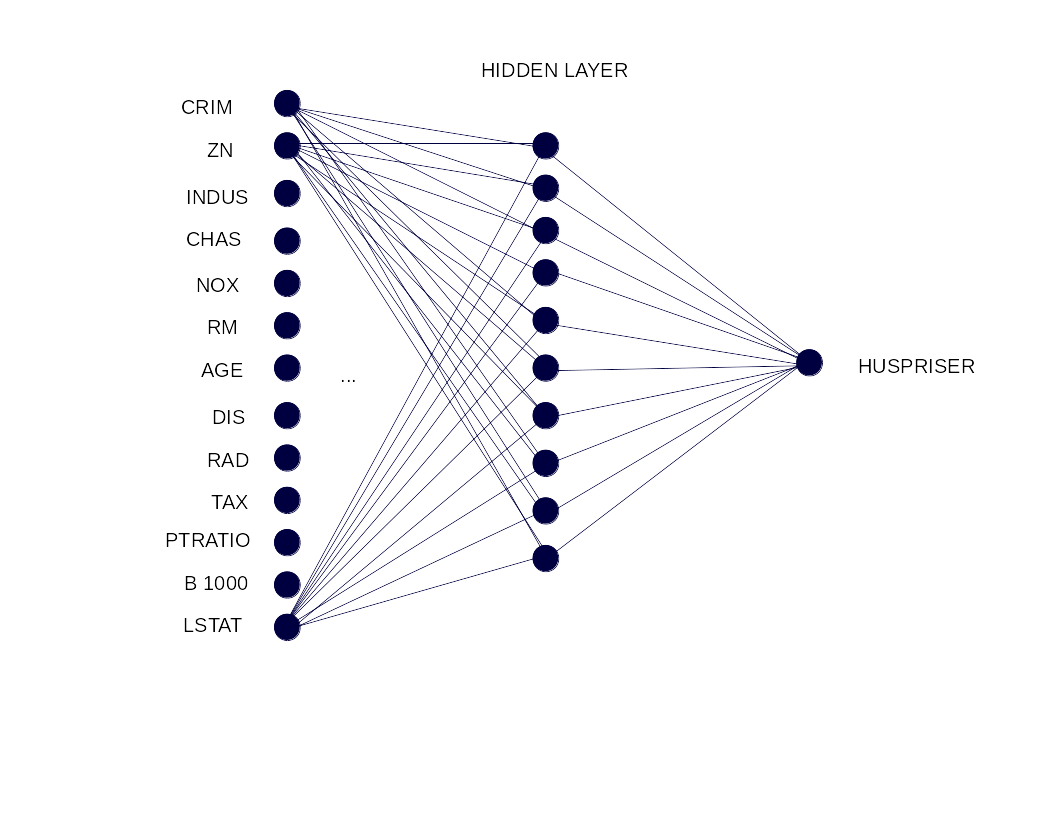

In [ ]:
# La oss bygge vår første neurale nett modell

neural_net_regression_model = MLPRegressor(hidden_layer_sizes=(10, )).fit(X_train,Y_train)

In [ ]:
# La oss predikere den første bydelen i testsettet

print('Predikert pris for bydelen', (int)((neural_net_regression_model.predict(X_test[0].reshape(1, -1))[0]) * 1000), '$')
print('Gjennomsnittlig pris i bydelen', Y_test[0] * 1000, '$')

Ble det bedre eller dårligere enn den lineære regresjonsmodellen?

In [ ]:
# vi kan kalkulere mean squared error for begge testsettene

print("MSE for lineær regresjonsmodell:", mean_squared_error(Y_test, linear_regression_model.predict(X_test)))
print("MSE for neuralnett:", mean_squared_error(Y_test, neural_net_regression_model.predict(X_test)))

Den lineære regresjonsmodellen er altså betydelig bedre enn det neurale nettet

In [ ]:
# oppgave
# 1. Skru opp antall epochs (max_iter)
# 2. Skru på antall neuroner i det skjulte laget
# 3. Øk antall skjulte lag
# 4. Prøv større og mindre train/test splits

Link til  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">MLPRegressor</a>